hw1 p5 K-means Clustering

@author IalvinchangI

### 1. import package

In [8]:
import numpy
import pandas
import matplotlib.pyplot as plt

### 2. read file

In [9]:
cdata = pandas.read_csv("cdata.csv")

points = cdata[["x", "y"]].to_numpy()
cluster = cdata["cluster"].to_numpy()

### 3. implement k-means

In [10]:
CONVERGENCE_THRESHOLD = 0.01

def k_means(k: int, datas: numpy.ndarray):
    centroids = datas[numpy.random.choice(datas.shape[0], size=k, replace=False)]

    while True:
        # find the nearest centorid for each data points
        nearest_centroid = numpy.argmin(numpy.linalg.norm(datas[:, numpy.newaxis, :] - centroids[numpy.newaxis, :, :], axis=2), axis=1)

        # move the centroid to the center of its data points
        old_centorids = centroids
        point_centroid = pandas.DataFrame({"point": list(datas), "centroid": nearest_centroid})
        centroids = numpy.vstack(point_centroid.groupby("centroid")["point"].mean())

        # continue or not
        if numpy.all(numpy.linalg.norm(centroids - old_centorids, axis=1) <= CONVERGENCE_THRESHOLD):
            return centroids, point_centroid  # return the final result
        yield centroids, point_centroid  # return the result of each iteration


### 4. Sum of Squared Error (SSE)

In [11]:
def get_SSE(centroids: numpy.ndarray, point_centroid: pandas.DataFrame):
    group_point_centroid = point_centroid.groupby("centroid")

    output = 0
    for i in range(len(centroids)):
        output += numpy.sum(numpy.square(numpy.linalg.norm(numpy.vstack(group_point_centroid.get_group(i)["point"]) - centroids[i], axis=1)))

    return output


### Problem

#### Problem 1

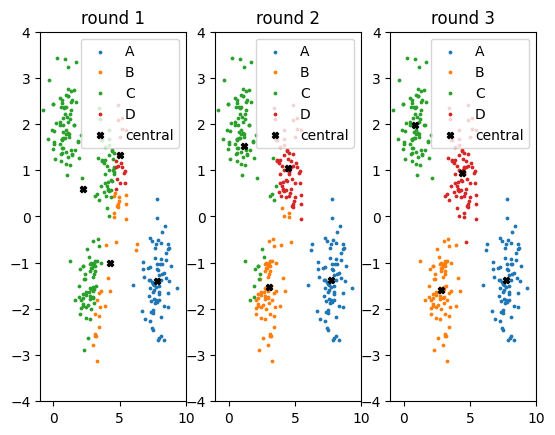

In [12]:
index2name = ["A", "B", "C", "D"]

rounds = list(k_means(4, points))

for i in range(len(rounds)):
    plt.subplot(1, len(rounds), i + 1)

    plt.axis([-1, 10, -4, 4])

    group_point_centroid = rounds[i][1].groupby("centroid")

    for group in range(4):
        group_point = numpy.vstack(group_point_centroid.get_group(group)["point"])
        plt.scatter(group_point[:, 0], group_point[:, 1], label=index2name[group], s=3)
    
    plt.scatter(rounds[i][0][:, 0], rounds[i][0][:, 1], label="central", s=20, color="k", marker="X")
    
    plt.title(f"round {i + 1}")
    plt.legend()


#### Problem 2

Text(0, 0.5, 'Sum of squared error')

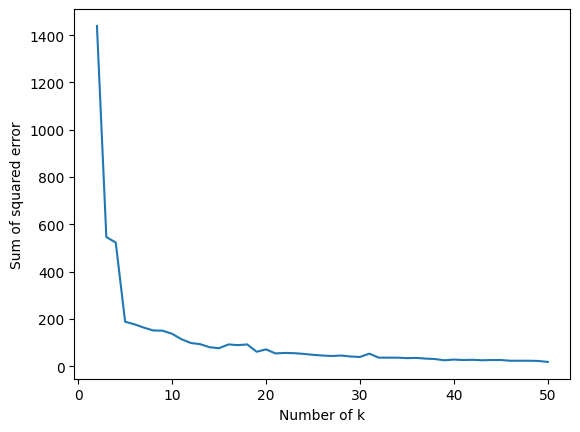

In [13]:
x = numpy.arange(2, 51)
sse = numpy.empty_like(x)
for k in x:
    sse[k - 2] = get_SSE(*tuple(k_means(k, points))[-1])

plt.plot(x, sse)
plt.xlabel("Number of k")
plt.ylabel("Sum of squared error")

#### Problem 3

Text(0, 0.5, 'Sum of squared error')

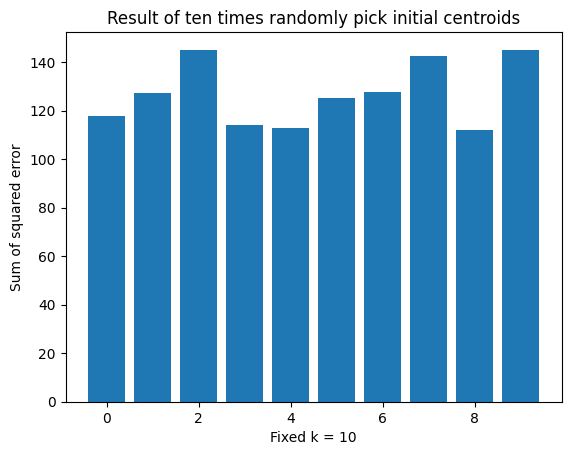

In [14]:
COUNT = 10
K = 10

sse = numpy.empty(COUNT)
for i in range(COUNT):
    sse[i] = get_SSE(*tuple(k_means(K, points))[-1])

plt.bar(numpy.arange(COUNT), sse)

plt.title("Result of ten times randomly pick initial centroids")
plt.xlabel(f"Fixed k = {K}")
plt.ylabel("Sum of squared error")